In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
solar4 = pd.read_csv("Solar 4.csv")

In [3]:
solar4

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,0.00,2019-06-05 14:00:00,2019,6,5,14,0,Solar4
1,4,0.00,2019-06-05 15:00:00,2019,6,5,15,0,Solar4
2,8,0.00,2019-06-05 16:00:00,2019,6,5,16,0,Solar4
3,12,0.00,2019-06-05 17:00:00,2019,6,5,17,0,Solar4
4,16,0.00,2019-06-05 18:00:00,2019,6,5,18,0,Solar4
...,...,...,...,...,...,...,...,...,...
12341,49364,0.00,2020-10-31 19:00:00,2020,10,31,19,0,Solar4
12342,49368,0.23,2020-10-31 20:00:00,2020,10,31,20,0,Solar4
12343,49372,0.70,2020-10-31 21:00:00,2020,10,31,21,0,Solar4
12344,49376,1.32,2020-10-31 22:00:00,2020,10,31,22,0,Solar4


In [4]:
solar4['datetime']=pd.to_datetime(solar4['datetime'], format='%Y-%m-%d %H:%M:%S')

solar4= solar4.set_index('datetime')

solar4= solar4.asfreq('H') 

<AxesSubplot:xlabel='datetime'>

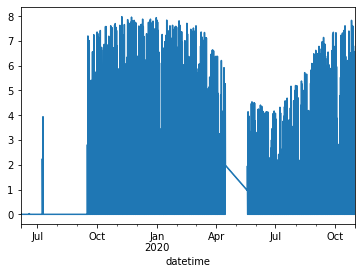

In [5]:
solar4["series_value"].plot()

In [6]:
'''
#Split Train-Val for Solar4
# ==============================================================================
start_train='2019-10-10 00:00'
end_train='2020-04-01 00:00'
start_val='2020-06-01 01:00'
end_val='2020-08-01 00:00'

start_test='2020-08-01 01:00'
'''
end_train='2020-08-01 00:00'
start_test='2020-08-01 01:00'

solar4train = solar4.loc[:end_train,:]
solar4test=solar4.loc[start_test:, :]

In [7]:
solar4train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2019-06-05 14:00:00,0,0.00,2019,6,5,14,0,Solar4
2019-06-05 15:00:00,4,0.00,2019,6,5,15,0,Solar4
2019-06-05 16:00:00,8,0.00,2019,6,5,16,0,Solar4
2019-06-05 17:00:00,12,0.00,2019,6,5,17,0,Solar4
2019-06-05 18:00:00,16,0.00,2019,6,5,18,0,Solar4
...,...,...,...,...,...,...,...,...
2020-07-31 20:00:00,40536,0.00,2020,7,31,20,0,Solar4
2020-07-31 21:00:00,40540,0.01,2020,7,31,21,0,Solar4
2020-07-31 22:00:00,40544,0.89,2020,7,31,22,0,Solar4


In [8]:
solar4test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-08-01 01:00:00,40556,4.71,2020,8,1,1,0,Solar4
2020-08-01 02:00:00,40560,5.20,2020,8,1,2,0,Solar4
2020-08-01 03:00:00,40564,4.96,2020,8,1,3,0,Solar4
2020-08-01 04:00:00,40568,4.15,2020,8,1,4,0,Solar4
2020-08-01 05:00:00,40572,2.91,2020,8,1,5,0,Solar4
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,49364,0.00,2020,10,31,19,0,Solar4
2020-10-31 20:00:00,49368,0.23,2020,10,31,20,0,Solar4
2020-10-31 21:00:00,49372,0.70,2020,10,31,21,0,Solar4


In [9]:
train_s4 = solar4train.reset_index()[["datetime","series_value"]]
train_s4.columns=["ds","y"]
train_s4

,ds,y
0,2019-06-05 14:00:00,0.00
1,2019-06-05 15:00:00,0.00
2,2019-06-05 16:00:00,0.00
3,2019-06-05 17:00:00,0.00
4,2019-06-05 18:00:00,0.00
...,...,...
10134,2020-07-31 20:00:00,0.00
10135,2020-07-31 21:00:00,0.01
10136,2020-07-31 22:00:00,0.89
10137,2020-07-31 23:00:00,1.68


In [10]:
model_s4 = Prophet()
model_s4.fit(train_s4)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_s4 = model_s4.make_future_dataframe(periods=2207,freq="H")
future_s4
#end 2020-10-31 23:00:00

,ds
0,2019-06-05 14:00:00
1,2019-06-05 15:00:00
2,2019-06-05 16:00:00
3,2019-06-05 17:00:00
4,2019-06-05 18:00:00
...,...
12341,2020-10-31 19:00:00
12342,2020-10-31 20:00:00
12343,2020-10-31 21:00:00
12344,2020-10-31 22:00:00


In [12]:
forecast_s4 = model_s4.predict(future_s4)
forecast_s4
#forecast_s4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-05 14:00:00,-0.049854,-2.553810,0.664397,-0.049854,-0.049854,-0.958840,-0.958840,-0.958840,-1.020104,-1.020104,-1.020104,0.061264,0.061264,0.061264,0.0,0.0,0.0,-1.008694
1,2019-06-05 15:00:00,-0.049803,-2.625529,0.612541,-0.049803,-0.049803,-0.932930,-0.932930,-0.932930,-0.994180,-0.994180,-0.994180,0.061250,0.061250,0.061250,0.0,0.0,0.0,-0.982733
2,2019-06-05 16:00:00,-0.049753,-2.558302,0.601817,-0.049753,-0.049753,-0.892121,-0.892121,-0.892121,-0.953434,-0.953434,-0.953434,0.061313,0.061313,0.061313,0.0,0.0,0.0,-0.941874
3,2019-06-05 17:00:00,-0.049702,-2.637104,0.625641,-0.049702,-0.049702,-0.898388,-0.898388,-0.898388,-0.959816,-0.959816,-0.959816,0.061428,0.061428,0.061428,0.0,0.0,0.0,-0.948090
4,2019-06-05 18:00:00,-0.049651,-2.590329,0.679423,-0.049651,-0.049651,-0.949600,-0.949600,-0.949600,-1.011168,-1.011168,-1.011168,0.061568,0.061568,0.061568,0.0,0.0,0.0,-0.999251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12341,2020-10-31 19:00:00,-0.212244,-3.065787,0.387683,-0.775533,0.240292,-1.043162,-1.043162,-1.043162,-1.003099,-1.003099,-1.003099,-0.040063,-0.040063,-0.040063,0.0,0.0,0.0,-1.255407
12342,2020-10-31 20:00:00,-0.212555,-2.774693,0.547987,-0.776082,0.240387,-0.830600,-0.830600,-0.830600,-0.790476,-0.790476,-0.790476,-0.040124,-0.040124,-0.040124,0.0,0.0,0.0,-1.043155
12343,2020-10-31 21:00:00,-0.212867,-2.228713,1.172121,-0.776631,0.240479,-0.341347,-0.341347,-0.341347,-0.300860,-0.300860,-0.300860,-0.040487,-0.040487,-0.040487,0.0,0.0,0.0,-0.554214
12344,2020-10-31 22:00:00,-0.213178,-1.572875,2.019089,-0.777180,0.240539,0.357551,0.357551,0.357551,0.398694,0.398694,0.398694,-0.041144,-0.041144,-0.041144,0.0,0.0,0.0,0.144373


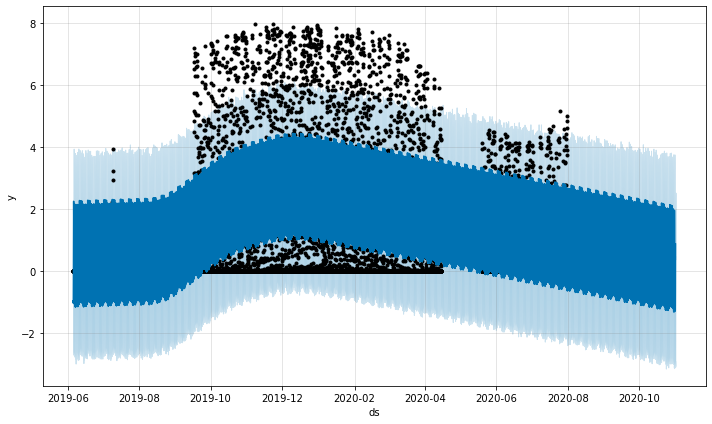

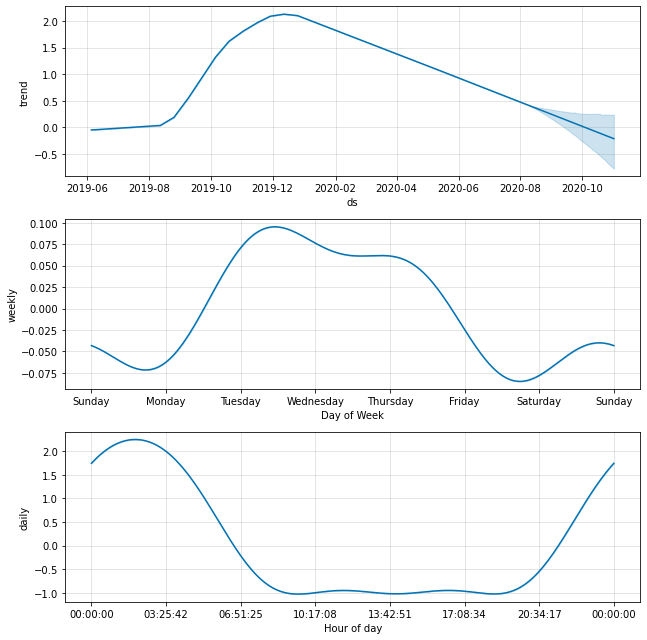

In [13]:
# plot the prediction 
fig= model_s4.plot(forecast_s4)
#plot predictions 
fig= model_s4.plot_components(forecast_s4)

In [14]:
forecast_s4["additive_terms"]
additive_terms =  pd.DataFrame(forecast_s4["additive_terms"])
print(additive_terms)

solar4["series_value"]
actual_value = pd.DataFrame(solar4.reset_index()["series_value"])
actual_value
print(actual_value)

       additive_terms
0           -0.958840
1           -0.932930
2           -0.892121
3           -0.898388
4           -0.949600
...               ...
12341       -1.043162
12342       -0.830600
12343       -0.341347
12344        0.357551
12345        1.095536

[12346 rows x 1 columns]
       series_value
0              0.00
1              0.00
2              0.00
3              0.00
4              0.00
...             ...
12341          0.00
12342          0.23
12343          0.70
12344          1.32
12345          3.40

[12346 rows x 1 columns]


In [15]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(solar4.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_s4["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2019-06-05 14:00:00,0.958840,-0.958840,0.00
1,2019-06-05 15:00:00,0.932930,-0.932930,0.00
2,2019-06-05 16:00:00,0.892121,-0.892121,0.00
3,2019-06-05 17:00:00,0.898388,-0.898388,0.00
4,2019-06-05 18:00:00,0.949600,-0.949600,0.00
...,...,...,...,...
12341,2020-10-31 19:00:00,1.043162,-1.043162,0.00
12342,2020-10-31 20:00:00,1.060600,-0.830600,0.23
12343,2020-10-31 21:00:00,1.041347,-0.341347,0.70
12344,2020-10-31 22:00:00,0.962449,0.357551,1.32


In [16]:
output.to_csv("s4_actual_additive.csv",index=False)